# 데이터분석과정

데이터 분석의 과정은 아래와 같음
1. The Problem Data : **분석에 대한 이해**
    * Descriptive
    * Exploratory
    * Inferential
    * Predictive
    * Causal
2. Preparation ( Data Load -> Check -> Tidy(선택)) : **데이터에 대한 이해**
    * Check N
    * Check Head & Tail
    * Check Data Schema & Data Type
    * Check Missing Values
3. Data Exploration : **분석에 대한 이해 + 데이터에 대한 이해**
4. Predictive
5. Modeling
6. Visualization of Results

## 1. The Problem Data
### Kaggle 타이타닉 

#### 1. 목표
1. 타이타닉 탑승객에 대해서 리포팅하고.
2. 타이타닉 침몰사고에서 생존에 영향을 준 요소들에 대한 분석 인사이트 도출
3. 분석 인사이트를 기반으로 생존자 예측 모형을 개발한다.

#### 2. 평가방법 
정확도(accuracy) : 전체 중에 잘 맞춘 비율

## 2. Preparation 

### (1) Data Load

로컬환경에서의 데이터 타입은 크게 .CSV, .TXT, .XLSX, JSON 4가지가 존재. <br>
대부분은 CSV를 사용 CSV란 Comma Seperated values 로 데이터를 콤마(,)로 구분하여 표현하는 방식

```연도,제조서,모델,설명,가격
1997,Ford,E350,"ac, abs, moon",3000.00
1999,Chevy,"Venture ""Extended Edition""","",4900.00
1999,Chevy,"Venture ""Extended Edition, Very Large""",,5000.00
1996,Jeep,Grand Cherokee,"MUST SELL!
air, moon roof, loaded",4799.00 
```

CSV  파일을 로드하기 위해서는 pandas 라이브러리의 ```read_csv``` 함수를 사용함. (함수에 대한 정보는 https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html 에서 확인가능)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# pandas 자료형 설명해주기.
%matplotlib inline

In [2]:
# 데이터 로드
# .₩(/) 와 ..₩(/) 설명해줄것.

train = pd.read_csv( "./train.csv", sep = ',', header = 0, index_col =None)
test = pd.read_csv( "./test.csv", sep = ',', header = 0, index_col =None)

### STEP 01 : Check Data

1. Check N
2. Check Head & Tail
3. Check Schema
4. Check Data Schema
5. Check Missing Values

In [3]:
# 1. Check N,
# shape는 Attribute 라고 부름.  pd.read_csv 함수로 데이터를 만들면 자동으로 데이터프레임과 같이 생성됨.

train.shape

(891, 12)

In [4]:
# 2. Check Head & Tail
# head() 는 메소드(method) 라 부름.
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### 보충. 메소드와 Attribute 
car에 이름과 번호가 있기도 하지만, car는 앞으로 전진할수도 있고 후진하는 행동도 할 수 있다. 이 때 번호와 이름처럼 객체에 저장된 정보를```Attribute``` 라고 하고 행동에 해당하는 것을 ```메소드```라 부른다. 

3. Check Schema : 데이터를 적재할 때는 데이터를 설명하는 스키마( 혹은 description)을 정의하는게 필수적임. 따라서 데이터를 이해하기 위해서는 스키마 체크가 필수

스키마 정보 : https://www.kaggle.com/c/titanic/data

```
pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.
```

In [5]:
# Check Data Type
# .info() 는 메소드
# 자료형 설명해 주기 '1' + 1 = 2? '11'?
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [36]:
train.describe(include=object)

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Coxon, Mr. Daniel",male,1601,C23 C25 C27,S
freq,1,577,7,4,644


In [6]:
# Check Missing Value 
# 165p or 204 page 

train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
# https://www.geeksforgeeks.org/python-pandas-isnull-and-notnull/
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
5,False,False,False,False,False,True,False,False,False,False,True,False
6,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,True,False
8,False,False,False,False,False,False,False,False,False,False,True,False
9,False,False,False,False,False,False,False,False,False,False,True,False


### Descriptive Analysis & Exploratory Data Analysis

보고자하는 변수와 다른 변수간의 관계를 본다 : ***Survived*** + A

1. 타겟이 범주형 변수고 독립변수도 범주형 변수일때
    * 기술통계치 : 그룹화된 피봇테이블을 활용하여, 갯수(count), 횟수(Frecuncy) 나, 비율(Ratio)
    * 그래프 :  그룹화된 막대그래프(Bar Plot) 를 통해 살펴본다.
<br><br>
2. 타겟이 범주형 변수고 독립변수가 양적 변수일때(범주형이 항상그룹)
    * 기술통계치 : 그룹 별 평균, 중앙값, 표준편차(분산), 왜도, 첨도, 4분위수, 10분위수
    * 그래프 :  히스토그램(혹은 밀도그래프), 상자그래프 누적분포 그래프 등을 사용하여 분포를 요약함. 
<br><br>
3. 타겟이 양적 변수고 독립변수가 범주형 변수일때(범주형이 항상그룹)
    * 기술통계치 : 피봇테이블을 활용하여, 갯수(count), 횟수(Frecuncy) 나, 비율(Ratio)
    * 그래프 :  막대그래프(Bar Plot) 를 통해 살펴본다.
<br><br>
4. 타겟이 양적 변수고 독립변수가 양적 변수일때
    * 기술통계치 : 공분산(Corvariation), 상관계수(Correlation)
    * 그래프 : 히트맵(Heatmap), 산점도(scatter Plot)

1. 제일 중요한 변수 부터 본다 : ***Survived***

Survived 는 범주형 변수이기 때문에 피봇테이블을 통해 기술통계치를 살펴본다.

생존자의 분포(명)
0    549
1    342
Name: Survived, dtype: int64


생존자의 분포(%)
0    0.616162
1    0.383838
Name: Survived, dtype: float64


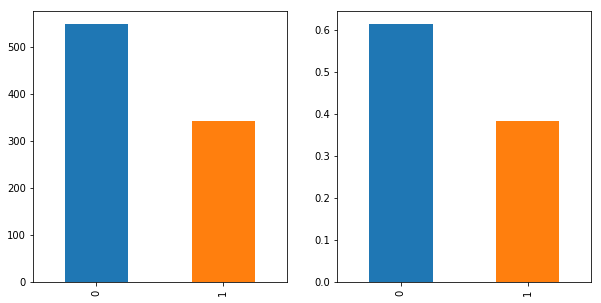

In [3]:
# Survived 칼럼
#value_counts() 메소드에 관한 설명은 201 p에서 참조가능.
# 칼럼 선택법은 165 Page 참조.
fig = plt.figure(figsize = [10,5])
ax = fig.subplots(1,2)

print("생존자의 분포(명)")
print(train.Survived.value_counts() )
print('\n')
print("생존자의 분포(%)")
print(train.Survived.value_counts()  / (549 + 342))

train.Survived.value_counts().plot(kind = 'bar', ax = ax[0])
(train.Survived.value_counts() / (549 + 342)).plot(kind = 'bar', ax = ax[1])

Gender 분포(명)
male      577
female    314
Name: Sex, dtype: int64


Gender 분포(%)
male      0.647587
female    0.352413
Name: Sex, dtype: float64


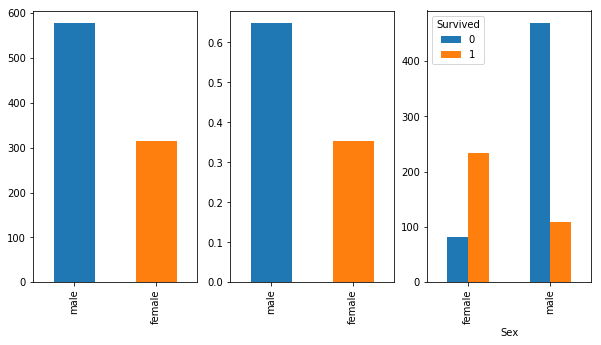

In [153]:
# Sex 칼럼
#value_counts() 메소드에 관한 설명은 201 p에서 참조가능.
# 칼럼 선택법은 165 Page 참조.
fig = plt.figure(figsize = [10,5])
ax = fig.subplots(1,3)

print("Gender 분포(명)")
print(train.Sex.value_counts() )
print('\n')
print("Gender 분포(%)")
print(train.Sex.value_counts()  / train.Sex.value_counts().sum())

train.Sex.value_counts().plot(kind = 'bar', ax = ax[0])
(train.Sex.value_counts() / train.Sex.value_counts().sum()).plot(kind = 'bar', ax = ax[1])
pd.crosstab(train['Sex'], train['Survived'], margins=False).plot(kind='bar',ax = ax[2])

In [167]:
pd.crosstab(train['Sex'], train['Survived'], margins=True)

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


In [148]:
pd.crosstab(train['Sex'], train['Survived'], margins=True,normalize='index')

Survived,0,1
Sex,,
female,0.257962,0.742038
male,0.811092,0.188908
All,0.616162,0.383838


In [147]:
pd.crosstab(train['Sex'], train['Survived'], margins=True,normalize='columns')

Survived,0,1,All
Sex,,,
female,0.147541,0.681287,0.352413
male,0.852459,0.318713,0.647587


생존자의 분포(명)
3    491
1    216
2    184
Name: Pclass, dtype: int64


생존자의 분포(%)
3    0.551066
1    0.242424
2    0.206510
Name: Pclass, dtype: float64


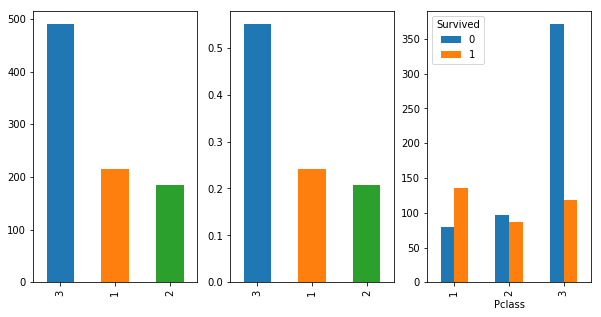

In [151]:
# Pclass 칼럼
#value_counts() 메소드에 관한 설명은 201 p에서 참조가능.
# 칼럼 선택법은 165 Page 참조.
fig = plt.figure(figsize = [10,5])
ax = fig.subplots(1,3)

print("Pclass 분포(명)")
print(train.Pclass.value_counts() )
print('\n')
print("Pclass 분포(%)")
print(train.Pclass.value_counts()  / train.Pclass.value_counts().sum())

train.Pclass.value_counts().plot(kind = 'bar', ax = ax[0])
(train.Pclass.value_counts() / train.Pclass.value_counts().sum()).plot(kind = 'bar', ax = ax[1])
pd.crosstab(train['Pclass'], train['Survived'], margins=False).plot(kind='bar',ax = ax[2])

SibSp 분포(명)
3    491
1    216
2    184
Name: Pclass, dtype: int64


SibSp 분포(%)
0    0.682379
1    0.234568
2    0.031425
4    0.020202
3    0.017957
8    0.007856
5    0.005612
Name: SibSp, dtype: float64


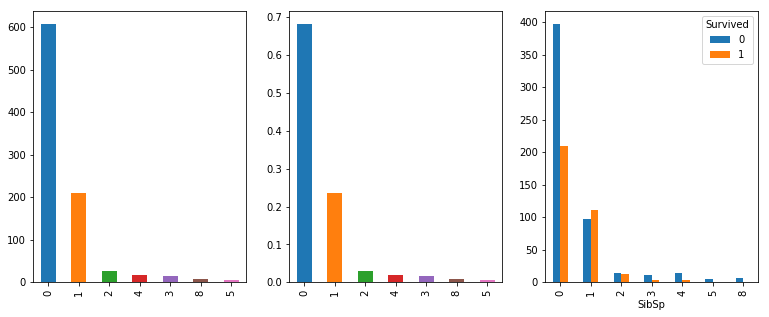

In [156]:
# SibSp 칼럼
#value_counts() 메소드에 관한 설명은 201 p에서 참조가능.
# 칼럼 선택법은 165 Page 참조.
fig = plt.figure(figsize = [13,5])
ax = fig.subplots(1,3)

print("SibSp 분포(명)")
print(train.Pclass.value_counts() )
print('\n')
print("SibSp 분포(%)")
print(train.SibSp.value_counts()  / train.SibSp.value_counts().sum())

train.SibSp.value_counts().plot(kind = 'bar', ax = ax[0])
(train.SibSp.value_counts() / train.SibSp.value_counts().sum()).plot(kind = 'bar', ax = ax[1])
pd.crosstab(train['SibSp'], train['Survived'], margins=False).plot(kind='bar',ax = ax[2])

In [158]:
pd.crosstab(train['SibSp'], train['Survived'], margins=True)

Survived,0,1,All
SibSp,,,
0,398,210,608
1,97,112,209
2,15,13,28
3,12,4,16
4,15,3,18
5,5,0,5
8,7,0,7
All,549,342,891


In [200]:
pd.crosstab(train['SibSp'], train['Survived'], margins=True,normalize='index')

Survived,0,1
SibSp,,
0,0.654605,0.345395
1,0.464115,0.535885
2,0.535714,0.464286
3,0.750000,0.250000
4,0.833333,0.166667
5,1.000000,0.000000
8,1.000000,0.000000
All,0.616162,0.383838


Parch 분포(명)
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


Parch 분포(%)
0    0.760943
1    0.132435
2    0.089787
5    0.005612
3    0.005612
4    0.004489
6    0.001122
Name: Parch, dtype: float64


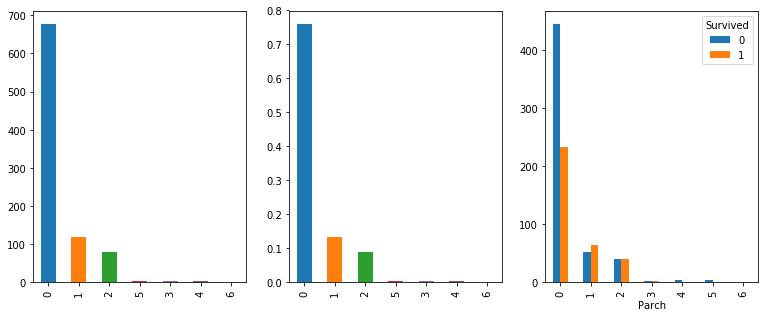

In [204]:
# Parch 칼럼
#value_counts() 메소드에 관한 설명은 201 p에서 참조가능.
# 칼럼 선택법은 165 Page 참조.
fig = plt.figure(figsize = [13,5])
ax = fig.subplots(1,3)

print("Parch 분포(명)")
print(train.Parch.value_counts() )
print('\n')
print("Parch 분포(%)")
print(train.Parch.value_counts()  / train.Parch.value_counts().sum())

train.Parch.value_counts().plot(kind = 'bar', ax = ax[0])
(train.Parch.value_counts() / train.Parch.value_counts().sum()).plot(kind = 'bar', ax = ax[1])
pd.crosstab(train['Parch'], train['Survived'], margins=False).plot(kind='bar',ax = ax[2])

In [201]:
pd.crosstab(train['Parch'], train['Survived'], margins=True)

Survived,0,1,All
Parch,,,
0,445,233,678
1,53,65,118
2,40,40,80
3,2,3,5
4,4,0,4
5,4,1,5
6,1,0,1
All,549,342,891


In [203]:
pd.crosstab(train['Parch'], train['Survived'], margins=True,normalize='columns')

Survived,0,1,All
Parch,,,
0,0.810565,0.681287,0.760943
1,0.096539,0.190058,0.132435
2,0.072860,0.116959,0.089787
3,0.003643,0.008772,0.005612
4,0.007286,0.000000,0.004489
5,0.007286,0.002924,0.005612
6,0.001821,0.000000,0.001122


In [202]:
pd.crosstab(train['Parch'], train['Survived'], margins=True,normalize='index')

Survived,0,1
Parch,,
0,0.656342,0.343658
1,0.449153,0.550847
2,0.500000,0.500000
3,0.400000,0.600000
4,1.000000,0.000000
5,0.800000,0.200000
6,1.000000,0.000000
All,0.616162,0.383838


Embarked 분포(명)
S    644
C    168
Q     77
Name: Embarked, dtype: int64


Embarked 분포(%)
S    0.724409
C    0.188976
Q    0.086614
Name: Embarked, dtype: float64


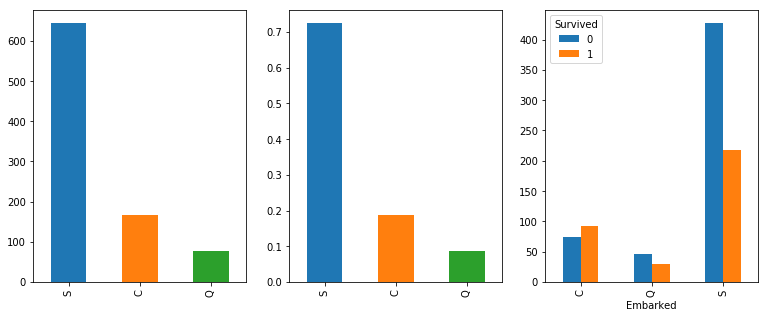

In [162]:
# Embarked 칼럼
#value_counts() 메소드에 관한 설명은 201 p에서 참조가능.
# 칼럼 선택법은 165 Page 참조.
fig = plt.figure(figsize = [13,5])
ax = fig.subplots(1,3)

print("Embarked 분포(명)")
print(train.Embarked.value_counts() )
print('\n')
print("Embarked 분포(%)")
print(train.Embarked.value_counts()  / train.Embarked.value_counts().sum())

train.Embarked.value_counts().plot(kind = 'bar', ax = ax[0])
(train.Embarked.value_counts() / train.Embarked.value_counts().sum()).plot(kind = 'bar', ax = ax[1])
pd.crosstab(train['Embarked'], train['Survived'], margins=False).plot(kind='bar',ax = ax[2])

In [75]:
train.describe(include=np.number)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


전체 탑승객의 평균 나이는 29.69911764705882 입니다.
사망자의 평균 나이는 30.62617924528302 입니다.
생존자의 평균 나이는 28.343689655172415 입니다.


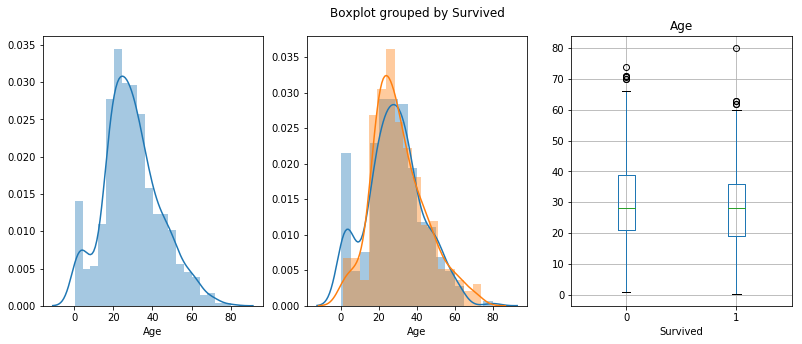

In [192]:
fig = plt.figure(figsize = [13,5])
ax = fig.subplots(1,3)

print("전체 탑승객의 평균 나이는 {0} 입니다.".format(train.Age.dropna().mean()))
print("사망자의 평균 나이는 {0} 입니다.".format(train[train.Survived == 0]['Age'].dropna().mean()))
print("생존자의 평균 나이는 {0} 입니다.".format(train[train.Survived == 1]['Age'].dropna().mean()))

sns.distplot(train.Age.dropna(), ax = ax[0])
sns.distplot(train[train.Survived == 1]['Age'].dropna(), ax=ax[1])
sns.distplot(train[train.Survived == 0]['Age'].dropna(), ax=ax[1])
train.boxplot(column=['Age'], by='Survived', ax = ax[2])

전체 탑승객의 평균 요금은 32.2042079685746 입니다.
사망자의 평균 요금은 22.117886885245877 입니다.
생존자의 평균 요금은 48.39540760233917 입니다.


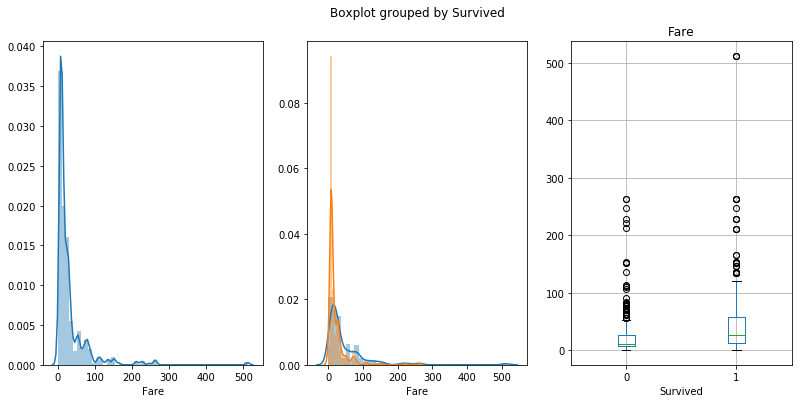

In [195]:
fig = plt.figure(figsize = [13,6])
ax = fig.subplots(1,3)

print("전체 탑승객의 평균 요금은 {0} 입니다.".format(train.Fare.dropna().mean()))
print("사망자의 평균 요금은 {0} 입니다.".format(train[train.Survived == 0]['Fare'].dropna().mean()))
print("생존자의 평균 요금은 {0} 입니다.".format(train[train.Survived == 1]['Fare'].dropna().mean()))

sns.distplot(train.Fare.dropna(), ax = ax[0])
sns.distplot(train[train.Survived == 1]['Fare'].dropna(), ax=ax[1])
sns.distplot(train[train.Survived == 0]['Fare'].dropna(), ax=ax[1])
train.boxplot(column=['Fare'], by='Survived', ax = ax[2])

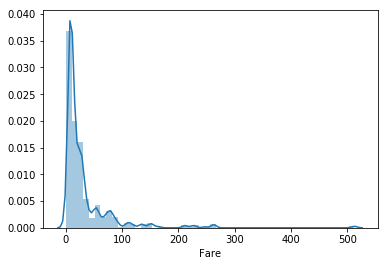

In [94]:
fig = plt.figure(figsize = [13,6])
ax = fig.subplots(1,3)

print("전체 탑승객의 평균 요금은 {0} 입니다.".format(train.Fare.dropna().mean()))
print("사망자의 평균 요금은 {0} 입니다.".format(train[train.Survived == 0]['Fare'].dropna().mean()))
print("생존자의 평균 요금은 {0} 입니다.".format(train[train.Survived == 1]['Fare'].dropna().mean()))

sns.distplot(train.Fare.dropna(), ax = ax[0])
sns.distplot(train[train.Survived == 1]['Fare'].dropna(), ax=ax[1])
sns.distplot(train[train.Survived == 0]['Fare'].dropna(), ax=ax[1])
train.boxplot(column=['Fare'], by='Survived', ax = ax[2])

/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


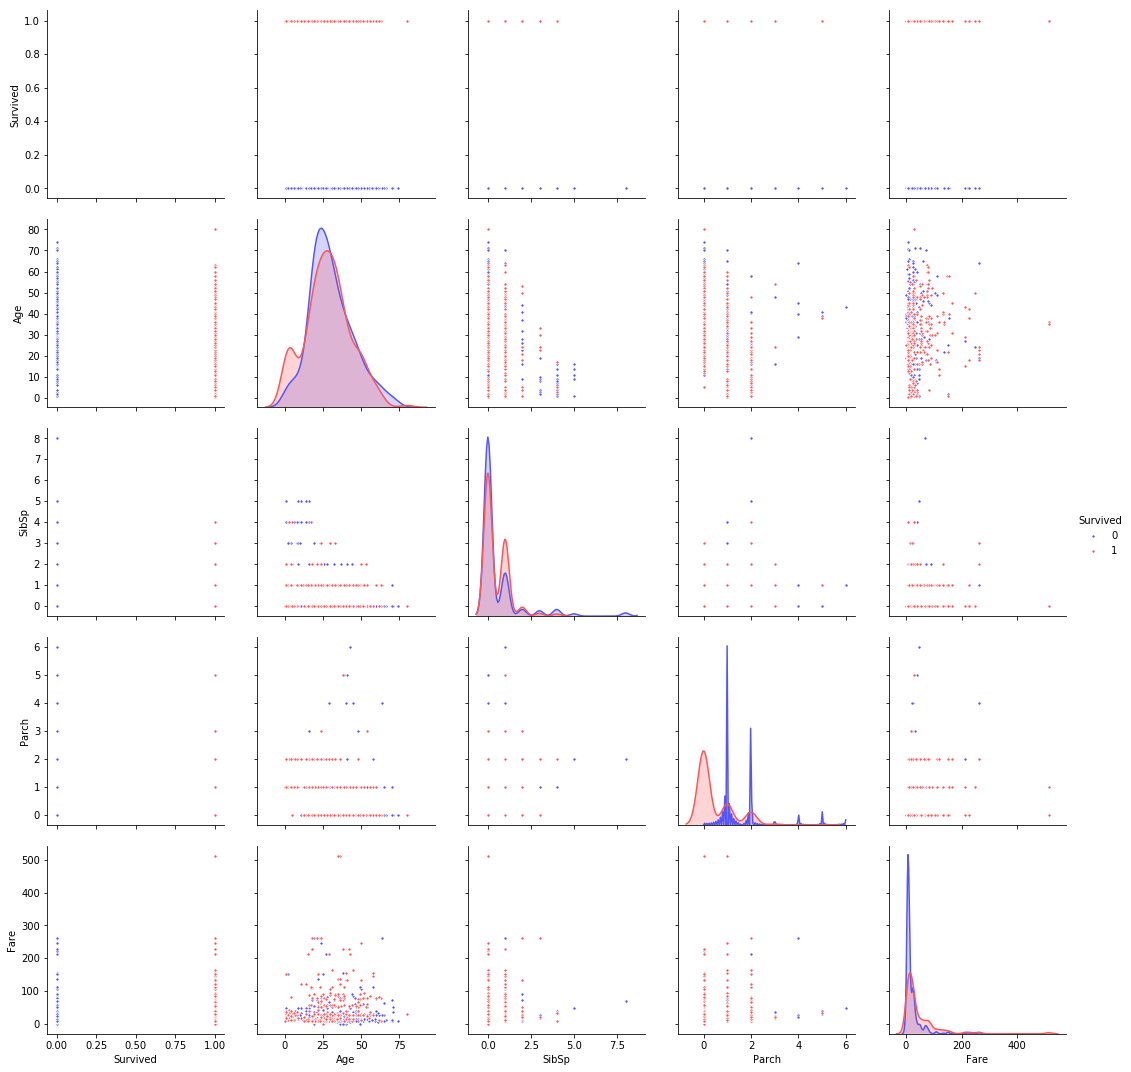

In [197]:
sns.pairplot(train[['Survived', 'Age' , 'SibSp', 'Parch', 'Fare']], 
                     hue='Survived', 
                     palette = 'seismic',
                     size=3,
                     diag_kind = 'kde',
                     diag_kws=dict(shade=True),
                     plot_kws=dict(s=10) )

In [244]:
#test_submit = test
test['Survived'] = 0
test['Survived'][test.Sex == 'female' ] = 1
test['Survived'][test.Age < 15 ] = 1
test['Survived'][test.SibSp < 3 ] = 1
test['Survived'][test.Embarked == 'C' ] = 1
test['Survived'][test.Parch == 1 ] = 1
test['Survived'][test.Pclass == 1 ] = 1

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda3/lib/python3.7/site-packages

In [246]:
test[['PassengerId','Survived']].to_csv('./submit.csv', index= False)

In [241]:
test[['PassengerId','Survived']]

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,1
6,898,1
7,899,1
8,900,1
9,901,0
